# CLIP

This section is a basic tutorial to use CLIP to generate the embeddings for your image dataset. 

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 851.9 kB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-wbed_ccb
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-wbed_ccb
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import clip

In [ ]:
model, preprocess = clip.load('ViT-B/32')
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")

100%|███████████████████████████████████████| 338M/338M [00:40<00:00, 8.70MiB/s]


NameError: name 'np' is not defined

In [ ]:
preprocess

In [ ]:
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")

Model parameters: 151,277,313


In [ ]:
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# img = Image.open("/content/drive/MyDrive/AmartyaPassportpic.jpg")
image_tensor = preprocess(Image.open("/content/drive/MyDrive/yourPic.jpg")).unsqueeze(0).to(device)
print(image_tensor.shape)
image_embed = model.encode_image(image_tensor)
print(image_embed.shape)
print(image_embed.dtype)

torch.Size([1, 3, 224, 224])
torch.Size([1, 512])
torch.float32



You can now use the above code and walk through your dataset directory and generate the embeddings.
It is a time consuming process, and will require significant gpu usage, so you can run this part on Kaggle. Once done, save the embeddings to .pt files that you can use later.


# ESSENTIALS

These are the building blocks of the modules used in the research paper, including the components for a transformer encoder block, the self attention, the custom loss functions defined in the paper. 

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import math

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Function to generate positional encodings for transformer

def gen_pe(max_length, d_model, n=10000):

  # generate an empty matrix for the positional encodings (pe)
  pe = np.zeros(max_length*d_model, dtype=np.float32).reshape(max_length, d_model)

  # for each position
  for k in np.arange(max_length):

    # for each dimension
    for i in np.arange(d_model//2):

      # calculate the internal value for sin and cos
      theta = k / (n ** ((2*i)/d_model))

      # even dims: sin
      pe[k, 2*i] = math.sin(theta)

      # odd dims: cos
      pe[k, 2*i+1] = math.cos(theta)

  pe = torch.tensor(pe)

  return pe.view(1, max_length, d_model)

pe = gen_pe(4, 196)
pe = pe.to(device)
# print(pe.shape)

In [ ]:
# This class is used to transform the embeddings to 196 dimensional embeddings used in the transformer blocks defined in the research paper.
# Sequence length is not given, so we use that as a hyperparameter seq_length. Reshaping the input vector such that it can be divided into a seq_length * 196 matrix


class initial_data_transform(nn.Module):

  def __init__(self, embed_dim, CLIP_embed_dim, seq_length):

    super(initial_data_transform, self).__init__()

    self.data_transform_weights = nn.Linear(CLIP_embed_dim, seq_length * embed_dim)
    # self.batch_size = batch_size
    self.seq_length = seq_length
    self.embed_dim = embed_dim
    self.CLIP_embed_dim = CLIP_embed_dim


  def forward(self, data):

    data = self.data_transform_weights(data)
    # print(data.shape)
    data = data.view(data.size(0), self.seq_length, self.embed_dim)
    return data

In [ ]:

class MultiHeadAttention(nn.Module):

  def __init__(self, n_heads, embed_dim, seq_length) :

    super(MultiHeadAttention, self).__init__()

    self.n_heads = n_heads
    self.embed_dim = embed_dim
    # self.batch_size = batch_size
    self.seq_length = seq_length
    self.single_head_dim = embed_dim // n_heads

    # self.data_transform_weights = nn.Linear(CLIP_embed_dim, seq_length * embed_dim)


    # Generating the query, key and value vectors
    self.query_weights = nn.Linear(embed_dim, embed_dim)
    self.key_weights = nn.Linear(embed_dim, embed_dim)
    self.value_weights = nn.Linear(embed_dim, embed_dim)
    self.output_weights = nn.Linear(embed_dim, embed_dim)


  def generateMultiHeadQVK(self, data) :

    # print(data.dtype)
    Q = self.query_weights(data)
    # print(Q.shape)
    K = self.key_weights(data)
    V = self.value_weights(data)

  # Reshaping them such that we divide the Q,V,K vectors into unique Q,V,Ks for each attention head. 

    Q = Q.view(data.size(0), self.seq_length, self.n_heads, self.single_head_dim).transpose(1,2)
    V = V.view(data.size(0), self.seq_length, self.n_heads, self.single_head_dim).transpose(1,2)
    K = K.view(data.size(0), self.seq_length, self.n_heads, self.single_head_dim).transpose(1,2)


    return Q,V,K



  def generateAttentionScores(self, Q, K):

    K = K.transpose(2,3)
    # print(K.shape)
    attention_matrix = torch.matmul(Q, K / math.sqrt(self.single_head_dim))
    # print(attention_matrix.shape)
    attention_scores = torch.softmax(attention_matrix, dim = -1)

    return attention_scores


  # Using the attention scores and calculating the new context rich vectors.
  def getContextualizedVectors(self, attention_scores, V):

    contextualized_vectors = torch.matmul(attention_scores, V)
    batch_size = contextualized_vectors.size(0)
    # print(contextualized_vectors.shape)
    contextualized_vectors = contextualized_vectors.transpose(1,2).contiguous().view(batch_size, self.seq_length, self.embed_dim)
    # print(contextualized_vectors.shape)
    return contextualized_vectors


  # The forward propagation pipeline in the attention mechanism
  def forward(self, data):

    # data = self.initial_data_transform(data)
    upd_data = data + pe
    # print(upd_data.shape)
    Q, V, K = self.generateMultiHeadQVK(upd_data)
    attention_scores = self.generateAttentionScores(Q, K)
    contextualized_vectors = self.getContextualizedVectors(attention_scores, V)
    multihead_output = self.output_weights(contextualized_vectors)
    return multihead_output, data


In [ ]:
# The feed forward linear network after attention mechanism

class Positionwise_Feed_Forward(nn.Module):
   def __init__(self, embed_dim, ff_dim) :
      super(Positionwise_Feed_Forward, self).__init__()

      self.fc_layer1 = nn.Linear(embed_dim, ff_dim)
      self.Relu = nn.ReLU()
      self.fc_layer2 = nn.Linear(ff_dim, embed_dim)

   def forward(self, multihead_output) :

      fc1_output = self.fc_layer1(multihead_output)
      # print(fc1_output.shape)
      activation = self.Relu(fc1_output)
      fc2_output = self.fc_layer2(activation)

      return fc2_output

In [ ]:
# Adding the dropout and layer normalization in the end of the transformer block and constructing the transformer pipeline

class GenDetTransformerBlock(nn.Module):

   def __init__(self, seq_length, ff_dim = 4*196, embed_dim = 196, n_heads = 4,) :

    super(GenDetTransformerBlock, self).__init__()


    # self.MultiHeadAttention = MultiHeadAttention(n_heads = n_heads, batch_size = batch_size, embed_dim = embed_dim, seq_length = seq_length)
    self.MultiHeadAttention = MultiHeadAttention(n_heads = n_heads, embed_dim = embed_dim, seq_length = seq_length)
    self.Positionwise_Feed_Forward = Positionwise_Feed_Forward(embed_dim = embed_dim, ff_dim = ff_dim)
    self.Norm1 = nn.LayerNorm(embed_dim)
    self.Norm2 = nn.LayerNorm(embed_dim)
    self.dropout = nn.Dropout(0.2)

   def forward(self, data):
      multihead_output, data = self.MultiHeadAttention(data)
      add_norm1_output = (data + self.Norm1(self.dropout(multihead_output)))
      ff_output = self.Positionwise_Feed_Forward(add_norm1_output)
      final_add_norm2_output = (data + self.Norm2(self.dropout(ff_output)))
      return final_add_norm2_output

# Loss Functions

These are the custom loss functions defined in the research paper for various stages of the training and testing process.

In [ ]:
from torch import linalg as LA

class TeacherStudent_loss_fake(nn.Module):

  def __init__(self):

    super(TeacherStudent_loss_fake, self).__init__()

    self.reg_M = 0.5

  def forward(self, y_t, y_s):
      y_t_Norm = LA.norm(y_t, dim=1, keepdim=True)
      # print(y_t_Norm.shape)
      Y_t = y_t / y_t_Norm
      # print(Y_t.shape)


      y_s_Norm = LA.norm(y_s, dim=1, keepdim=True)
      # print(y_s_Norm.shape)
      Y_s = y_s / y_s_Norm
      # print(Y_s.shape)

      discrep = (Y_t- Y_s).pow(2).sum(dim=1)
      losses = torch.clamp(self.reg_M - discrep, min=0)
      # print(losses.shape, losses)
      batch_loss = losses.mean()
      return batch_loss
      # return torch.max(t)




In [ ]:
class mse_loss_new(nn.Module):
    # Sums over non-batch dimensions, then averages over the batch dimension.
    def __init__(self):
      super(mse_loss_new, self).__init__()

    def forward(self, z_t, z_s):
      # losses = (z_t - z_s).pow(2).mean(dim=list(range(1, z_t.ndim)))
      diff = (z_t - z_s).pow(2)
      # print(diff)
      # print(torch.min(diff), torch.max(diff))
      losses = diff.mean(dim=list(range(1, z_t.ndim)))
      # print(losses)
      return losses.mean()

mse_new = mse_loss_new()
# loss = mse_new(arr1, arr2)
# print(loss)
# loss.backward()

In [ ]:
class mse_loss_new_withoutBatchAverage(nn.Module):

    def __init__(self):
      super(mse_loss_new_withoutBatchAverage, self).__init__()

    def forward(self, z_t, z_s):
      # losses = (z_t - z_s).pow(2).mean(dim=list(range(1, z_t.ndim)))
      diff = (z_t - z_s).pow(2)
      # print(diff)
      # print(torch.min(diff), torch.max(diff))
      losses = diff.mean(dim=list(range(1, z_t.ndim))).view(diff.size(0), 1)
      # print(losses)
      return losses

# Putting the GenDet Model together

In [ ]:
# Adding the teacher, student and augmenter modules seperately, and a sigmoid layer to get the outputs.

class GenDetComplete(nn.Module):

  def __init__(self, embed_dim, seq_length, CLIP_embed_dim, n_heads, ff_dim):

    super(GenDetComplete, self).__init__()

    self.initial_data_transform = initial_data_transform(embed_dim, CLIP_embed_dim, seq_length)
    self.Teacher = GenDetTransformerBlock(seq_length, ff_dim, embed_dim, n_heads)
    self.Student = GenDetTransformerBlock(seq_length, ff_dim, embed_dim, n_heads)
    self.Augmenter = GenDetTransformerBlock(seq_length, ff_dim, embed_dim, n_heads)
    self.fc_teacher = nn.Linear(seq_length * embed_dim, 1)
    # self.fc_student = nn.Linear(seq_length * embed_dim, 1)
    self.sigmoid_teacher = nn.Sigmoid()
    self.sigmoid_student = nn.Sigmoid()
    # self.batch_size = batch_size
    # self.fc_final = nn.Linear(1,1)
    # self.sigmoid_final = nn.Sigmoid()
    # self.MSELoss = nn.MSELoss()



  def forward(self, data, mode):

    data = self.initial_data_transform(data)
    batch_size = data.size(0)

    # if mode == "GenDet":
    #   data = self.Augmenter(data)


  # Added conditions to ignore the student and gendet blocks during the teacher stage of training

    if mode == "Inference":
      stu_out = self.Student(data)
      stu_out = stu_out.contiguous().view(batch_size, 784)

    elif mode != "Teacher":

      data = self.Augmenter(data)

      stu_out = self.Student(data)
      stu_out = stu_out.contiguous().view(batch_size, 784)


    teach_out = self.Teacher(data)
    teach_out = teach_out.contiguous().view(batch_size, 784)
    teach_out_final = self.fc_teacher(teach_out)
    # print(teach_out_final.shape)
    teach_out_final = self.sigmoid_teacher(teach_out_final)

    if mode != "Teacher":
      return teach_out, stu_out


    return teach_out_final


In [ ]:
# The Binary Classifier used for testing with the loss function as the input to the neural network. 

class Binary_Classifier(nn.Module):

  def __init__(self):

    super(Binary_Classifier,self).__init__()

    self.MSELoss = nn.MSELoss()
    self.fc_final = nn.Linear(1,1)
    self.sigmoid_final = nn.Sigmoid()

  def forward(self, teach_out, stu_out):

    loss = self.MSELoss(teach_out, stu_out).view(1,1)
    print(loss)
    p_out = self.fc_final(loss)
    out = self.sigmoid_final(p_out)

    return out

# Remove parameter settings out of model and put in training loop

In [ ]:
#mse loss calculated in which dimension, with or without mean? also BATCH_SIZE FOR LOSSES

#  MODEL AND DATALOADER

In [ ]:
# Importing the .pt files mentioned in the CLIP section, for the real and fake image encodings.


from torch.utils.data import TensorDataset, DataLoader, random_split

real_tensors = torch.load("/content/drive/MyDrive/gendet_image_encodings/image_encodings/real_image_encodings")
fake_tensors = torch.load("/content/drive/MyDrive/gendet_image_encodings/image_encodings/fake_image_encodings.pt")
all_tensors = real_tensors + fake_tensors
# print(len(real_tensors))
real_tensors = torch.cat(real_tensors)
fake_tensors = torch.cat(fake_tensors)
all_tensors = torch.cat(all_tensors)
print(real_tensors.shape)
print(fake_tensors.shape)
print(all_tensors.shape)

real_outputs = torch.ones((len(real_tensors), 1), dtype=torch.float32)
fake_outputs = torch.zeros((len(fake_tensors), 1), dtype=torch.float32)

all_outputs = torch.cat([real_outputs, fake_outputs])

print(real_outputs.shape, fake_outputs.shape, all_outputs.shape)
print(all_outputs[12068])

real_dataset = TensorDataset(real_tensors)
fake_dataset = TensorDataset(fake_tensors)
full_dataset = TensorDataset(all_tensors, all_outputs)

train_split = 0.8
val_split = 0.2




#---------------Creating separeate datasets for real, fake and all images as intended in the research paper---------------------

real_dataset_train, real_dataset_val = random_split(real_dataset, [math.ceil(train_split * len(real_dataset)), math.floor(val_split * len(real_dataset))])

# print(len(real_dataset_train.indices), len(real_dataset_val.indices))

fake_dataset_train, fake_dataset_val = random_split(fake_dataset, [math.ceil(train_split * len(fake_dataset)), math.floor(val_split * len(fake_dataset))])

# print(len(fake_dataset_train.indices), len(fake_dataset_val.indices))

full_dataset_train, full_dataset_val = random_split(full_dataset, [math.ceil(train_split * len(full_dataset)), math.floor(val_split * len(full_dataset))])

torch.Size([12068, 512])
torch.Size([13330, 512])
torch.Size([25398, 512])
torch.Size([12068, 1]) torch.Size([13330, 1]) torch.Size([25398, 1])
tensor([0.])


<ipython-input-176-4caa8d30e739>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  real_tensors = torch.load("/content/drive/MyDrive/gendet_image_encodings/image_encodings/re

In [ ]:
teacherLoaderTrain = DataLoader(full_dataset_train, batch_size=32, shuffle=True)
teacherLoaderVal = DataLoader(full_dataset_val, batch_size=32, shuffle=True)


for x, y in teacherLoaderTrain:
  print(x.shape, y.shape)
  break

for x, y in teacherLoaderVal:
  print(x.shape, y.shape)
  break

torch.Size([32, 512]) torch.Size([32, 1])
torch.Size([32, 512]) torch.Size([32, 1])


In [ ]:
realLoaderTrain = DataLoader(real_dataset_train, batch_size=64, shuffle=True)
realLoaderVal = DataLoader(real_dataset_val, batch_size=64, shuffle=True)

for i,x in enumerate(realLoaderTrain):
  print(x[0].shape, i)
  x[0].to
  break

for x in realLoaderVal:
  print(x[0].shape)
  break

torch.Size([64, 512]) 0
torch.Size([64, 512])


In [ ]:
fakeLoaderTrain = DataLoader(fake_dataset_train, batch_size=64, shuffle=True)
fakeLoaderVal = DataLoader(fake_dataset_val, batch_size=64, shuffle=True)

for x in fakeLoaderTrain:
  print(x[0].shape)
  break

for x in fakeLoaderVal:
  print(x[0].shape)
  break

torch.Size([64, 512])
torch.Size([64, 512])


# Hyperparameters

In [ ]:
# Hyperparameter values

import torch.optim as optim

embed_dim = 196
batch_size = 1
seq_length = 4
ff_dim = 196*4
n_heads = 4
ClIP_embed_dim = 512


epochs = 50
lr_transformer = 0.00001

lr_gendet = 0.001

# optimizer = optim.AdamW(genDetComplete.parameters(), lr= lr_transformer)

# Function to freeze student and augmenter parameters based on training mode

In [ ]:
def SetTrainingModeParams(mode:str):

    if mode == "Teacher":
      for param in model.Teacher.parameters():
        param.requires_grad =  True

      for param in model.Student.parameters():
        param.requires_grad =  False

      for param in model.Augmenter.parameters():
        param.requires_grad =  False

    elif mode == "Real" or mode == "Fake":
      for param in model.Student.parameters():
        param.requires_grad =  True

      for param in model.Teacher.parameters():
        param.requires_grad =  False

      for param in model.Augmenter.parameters():
        param.requires_grad =  False

    elif mode == "Fake Augmenter":
      for param in model.Augmenter.parameters():
        param.requires_grad =  True

      for param in model.Student.parameters():
        param.requires_grad =  False

      for param in model.Teacher.parameters():
        param.requires_grad =  False


In [ ]:
modes = ["Real","Fake","Fake Augmenter"]
losses = {}


#real images
losses["Teacher"] = nn.BCELoss()
losses["Real"] = mse_loss_new()
losses["Fake"] = TeacherStudent_loss_fake()
losses["Fake Augmenter"] = mse_loss_new()

#fake images
# losses["Teacher"] = nn.BCELoss()
# losses["Student"] = TeacherStudent_loss_fake()
# losses["GenDet"] = nn.MSELoss()


# Teacher Pretraining Phase

In [ ]:
# Training and Inference methods
# Pass Parameters?
#  NOT PASSING FAKE DATASET IN THREE STAGE
def Teacher_PreTrainer(trainLoader, valLoader):

  SetTrainingModeParams("Teacher")

  optimizer = optim.AdamW(model.parameters(), lr = lr_transformer)


  loss_fn = losses["Teacher"]

  train_losses = []
  train_accuracy =[]

  val_losses = []
  val_accuracy =[]


  for epoch in range(epochs):
    epoch_train_loss = 0
    epoch_train_accuracy = []

    epoch_val_loss = 0
    epoch_val_accuracy = []
    model.train()

    print('EPOCH {}:\n'.format(epoch + 1))
    for x, y in trainLoader:

      x = x.to(device)
      y = y.to(device)

      # print(x.shape, y.shape)
      optimizer.zero_grad()
      teach_out_final = model(x, "Teacher")
      loss = loss_fn(teach_out_final, y)
      loss.backward()
      optimizer.step()

      epoch_train_loss += loss.item()
      # print(epoch_train_loss)

      # print(epoch_train_loss)

      teach_out_final = (teach_out_final > 0.5).float()
      correct_predicts = (teach_out_final == y).float()
      accuracy = ((correct_predicts.sum() / correct_predicts.size(0)) * 100)
      epoch_train_accuracy.append(accuracy)


    print('TRAIN_LOSS: {}'.format(epoch_train_loss))
    train_losses.append(epoch_train_loss)
    avg_accuracy = (torch.stack(epoch_train_accuracy)).mean()
    train_accuracy.append(avg_accuracy)
    print('TRAIN_ACC: {}\n'.format(avg_accuracy))



    model.eval()

    with torch.no_grad():

      for x, y in valLoader:

        x = x.to(device)
        y = y.to(device)

        outs = model(x, "Teacher")
        loss = loss_fn(outs, y)

        epoch_val_loss += loss.item()

        outs = (outs > 0.5).float()
        outs = (outs == y).float()
        accuracy = ((outs.sum() / outs.size(0)) * 100)
        epoch_val_accuracy.append(accuracy)

    print('VAL_LOSS: {}'.format(epoch_val_loss))
    val_losses.append(epoch_val_loss)
    avg_accuracy = (torch.stack(epoch_val_accuracy)).mean()
    print('VAL_ACC: {}\n'.format(avg_accuracy))
    val_accuracy.append(epoch_val_accuracy)

  return train_accuracy, train_losses, val_accuracy, val_losses

#Warmup steps?

In [ ]:
epochs = 20
# lr_transformer = 0.000001
lr_transformer = 0.00001
Teacher_PreTrainer(teacherLoaderTrain, teacherLoaderVal)

# torch.save(model.state_dict(), PATH)

EPOCH 1:

TRAIN_LOSS: 265.6397636681795
TRAIN_ACC: 81.4212875366211

VAL_LOSS: 41.93561540171504
VAL_ACC: 88.81681823730469

EPOCH 2:

TRAIN_LOSS: 163.51772906258702
TRAIN_ACC: 89.52247619628906

VAL_LOSS: 41.593817837536335
VAL_ACC: 90.36180114746094

EPOCH 3:

TRAIN_LOSS: 143.82712575793266
TRAIN_ACC: 90.93440246582031

VAL_LOSS: 34.26261672284454
VAL_ACC: 91.89910125732422

EPOCH 4:

TRAIN_LOSS: 135.09545893594623
TRAIN_ACC: 91.5343246459961

VAL_LOSS: 32.24607868865132
VAL_ACC: 92.07170867919922

EPOCH 5:

TRAIN_LOSS: 126.94067922234535
TRAIN_ACC: 92.16043090820312

VAL_LOSS: 33.17227216344327
VAL_ACC: 92.11101531982422

EPOCH 6:

TRAIN_LOSS: 123.63036894239485
TRAIN_ACC: 92.34236145019531

VAL_LOSS: 31.92129190824926
VAL_ACC: 92.45709991455078

EPOCH 7:

TRAIN_LOSS: 121.38128453306854
TRAIN_ACC: 92.44570922851562

VAL_LOSS: 31.221492186188698
VAL_ACC: 92.73995208740234

EPOCH 8:

TRAIN_LOSS: 117.36820307001472
TRAIN_ACC: 92.72589874267578

VAL_LOSS: 32.608694788999856
VAL_ACC: 92.

# Load model again

In [ ]:
PATH = '/content/drive/MyDrive/teacher_pretrained.pt'
# torch.save(model.state_dict(), PATH)

model = GenDetComplete(embed_dim=embed_dim, seq_length=seq_length, ff_dim=ff_dim, n_heads=n_heads, CLIP_embed_dim=ClIP_embed_dim)

# , map_location=torch.device("cpu")

model.load_state_dict(torch.load(PATH, weights_only=False))

model = model.to(device)

# BC = Binary_Classifier().to(device)

# device
# epochs = 20
# lr_transformer = 0.000001
# # lr_transformer = 0.00001
# Teacher_PreTrainer(teacherLoaderTrain, teacherLoaderVal)

# Three stage model training

In [ ]:
#try 10?
def ThreeStage_Trainer(realLoaderTrain, realLoaderVal, fakeLoaderTrain, fakeLoaderVal):

  optimizer = optim.AdamW(model.parameters(), lr = lr_transformer)

  for epoch in range(epochs):
      print('EPOCH {}:\n'.format(epoch + 1))
      for mode in modes:

        SetTrainingModeParams(mode)

        # We set the loss function to use depending on which phase of training it is.
        loss_fn = losses[mode]
        train_loss = 0
        train_accuracy = []

        val_loss = 0
        val_accuracy = []


        if mode == "Real":
          model.train()
          for x in realLoaderTrain:

            X = x[0].to(device)

            optimizer.zero_grad()
            teach_out, stud_out = model(X, mode)
            # print(teach_out.shape)
            loss = loss_fn(teach_out, stud_out)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            # print(train_loss)

          print('{mode} TRAIN LOSS: {train_loss}'.format(mode = mode, train_loss = train_loss))

          model.eval()
          with torch.no_grad():

            for x in realLoaderVal:

              X = x[0].to(device)

              teach_out, stud_out = model(X, mode)
              loss = loss_fn(teach_out, stud_out)

              val_loss += loss.item()

          print('{mode} VAL LOSS: {val_loss}'.format(mode = mode, val_loss = val_loss))

        else:
          model.train()
          for x in fakeLoaderTrain:

            X = x[0].to(device)

            optimizer.zero_grad()
            teach_out, stud_out = model(X, mode)
            loss = loss_fn(teach_out, stud_out)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

          print('{mode} TRAIN LOSS: {train_loss}'.format(mode = mode, train_loss = train_loss))

          model.eval()
          with torch.no_grad():

            for x in fakeLoaderVal:

              X = x[0].to(device)

              teach_out, stud_out = model(X, mode)
              loss = loss_fn(teach_out, stud_out)

              val_loss += loss.item()

          print('{mode} VAL LOSS: {val_loss}'.format(mode = mode, val_loss = val_loss))




epochs = 5
lr_transformer = 0.0001
ThreeStage_Trainer(realLoaderTrain, realLoaderVal, fakeLoaderTrain, fakeLoaderVal)

EPOCH 1:

Real TRAIN LOSS: 49.657793790102005
Real VAL LOSS: 1.413122996687889
Fake TRAIN LOSS: 21.003014595189597
Fake VAL LOSS: 0.0013384358026087284
Fake Augmenter TRAIN LOSS: 153.37348747253418
Fake Augmenter VAL LOSS: 4.969570718705654
EPOCH 2:

Real TRAIN LOSS: 48.71669578552246
Real VAL LOSS: 1.4312446527183056
Fake TRAIN LOSS: 21.925677185878158
Fake VAL LOSS: 0.0023814779706299305
Fake Augmenter TRAIN LOSS: 222.89969128370285
Fake Augmenter VAL LOSS: 20.1786727309227
EPOCH 3:

Real TRAIN LOSS: 79.6107913851738
Real VAL LOSS: 3.809926487505436
Fake TRAIN LOSS: 10.216692567337304
Fake VAL LOSS: 0.0
Fake Augmenter TRAIN LOSS: 125.79384195804596
Fake Augmenter VAL LOSS: 4.22846432775259
EPOCH 4:

Real TRAIN LOSS: 59.524302273988724
Real VAL LOSS: 1.5210529416799545
Fake TRAIN LOSS: 11.675844843965024
Fake VAL LOSS: 0.00038497941568493843
Fake Augmenter TRAIN LOSS: 121.27310118079185
Fake Augmenter VAL LOSS: 6.534250348806381
EPOCH 5:

Real TRAIN LOSS: 48.05335921049118
Real VAL LO

# Making dataset for the Binary Classifier using the GenDet outputs

In [ ]:
# Creating Classifier data using model inference

GenDetTeachOuts_train = []
GenDetStudOuts_train = []
GenDetTeachOuts_val = []
GenDetStudOuts_val = []

GenDetActualOuts_train = []
GenDetActualOuts_val = []

model.eval()

with torch.no_grad():

  for x, y in teacherLoaderTrain:

    x = x.to(device)
    # y = y.to(device)
    teach_out, stud_out = model(x, "Inference")
    GenDetTeachOuts_train.append(teach_out)
    GenDetStudOuts_train.append(stud_out)
    GenDetActualOuts_train.append(y)

  for x, y in teacherLoaderVal:

    x = x.to(device)
    # y = y.to(device)
    teach_out, stud_out = model(x, "Inference")
    GenDetTeachOuts_val.append(teach_out)
    GenDetStudOuts_val.append(stud_out)
    GenDetActualOuts_val.append(y)


print(len(GenDetTeachOuts_train), len(GenDetStudOuts_train))
print(GenDetTeachOuts_train[0].shape)
print(GenDetStudOuts_train[0].shape)

print(len(GenDetTeachOuts_val), len(GenDetStudOuts_val))
print(GenDetTeachOuts_val[0].shape)
print(GenDetStudOuts_val[0].shape)

print(len(GenDetActualOuts_train), len(GenDetActualOuts_val))
print(GenDetActualOuts_train[0].shape, GenDetActualOuts_val[0].shape)

# BC_tensors = torch.cat(GenDetOuts)
# print(BC_tensors.shape)

635 635
torch.Size([32, 784])
torch.Size([32, 784])
159 159
torch.Size([32, 784])
torch.Size([32, 784])
635 159
torch.Size([32, 1]) torch.Size([32, 1])


In [ ]:
GenDetTeachOuts_train = torch.cat(GenDetTeachOuts_train)
GenDetTeachOuts_val = torch.cat(GenDetTeachOuts_val)

GenDetStudOuts_train = torch.cat(GenDetStudOuts_train)
GenDetStudOuts_val = torch.cat(GenDetStudOuts_val)

GenDetActualOuts_train = torch.cat(GenDetActualOuts_train)
GenDetActualOuts_val = torch.cat(GenDetActualOuts_val)


print(GenDetTeachOuts_train.shape, GenDetTeachOuts_val.shape,
      GenDetStudOuts_train.shape, GenDetStudOuts_val.shape,
      GenDetActualOuts_train.shape, GenDetActualOuts_val.shape)

torch.Size([20319, 784]) torch.Size([5079, 784]) torch.Size([20319, 784]) torch.Size([5079, 784]) torch.Size([20319, 1]) torch.Size([5079, 1])


In [ ]:
# The train and validation datasets for the Binary Classifier


BCDataset_train = TensorDataset(GenDetTeachOuts_train, GenDetStudOuts_train, GenDetActualOuts_train)
BCDataset_val = TensorDataset(GenDetTeachOuts_val, GenDetStudOuts_val, GenDetActualOuts_val)

BCTrainLoader = DataLoader(BCDataset_train, batch_size=32, shuffle=True)
BCValLoader = DataLoader(BCDataset_val, batch_size=32, shuffle=True)

In [ ]:
for x, y, z in BCTrainLoader:
  print(x.shape, y.shape, z.shape)
  break

for x, y, z in BCValLoader:
  print(x.shape, y.shape, z.shape)
  break

torch.Size([32, 784]) torch.Size([32, 784]) torch.Size([32, 1])
torch.Size([32, 784]) torch.Size([32, 784]) torch.Size([32, 1])


# Training the Classifier

In [ ]:
# BC = Binary_Classifier().to(device)
class FinalClassifier(nn.Module):
  def __init__(self):
    super(FinalClassifier, self).__init__()


    self.loss_fn = mse_loss_new_withoutBatchAverage()
    self.fc1 = nn.Linear(1,1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, teach_out, stud_out):
    loss = self.loss_fn(teach_out, stud_out)
    fc1_out = self.fc1(loss)
    outs = self.sigmoid(fc1_out)

    return outs

FC = FinalClassifier().to(device)


In [ ]:
def BinaryClassifier_Trainer(dataLoaderTrain, dataLoaderVal):

  optimizer = optim.AdamW(FC.parameters(), lr = lr_transformer)
  loss_fn = nn.BCELoss()

  train_losses = []
  train_accuracy =[]

  val_losses = []
  val_accuracy =[]


  for epoch in range(epochs):

    print('EPOCH {}:\n'.format(epoch + 1))

    epoch_train_loss = 0
    epoch_train_accuracy = []

    epoch_val_loss = 0
    epoch_val_accuracy = []

    FC.train()

    for x, y, z in dataLoaderTrain:

      x = x.to(device)
      y = y.to(device)
      z = z.to(device)


      optimizer.zero_grad()
      outs = FC(x, y)
      # print(outs, z)
      loss = loss_fn(outs, z)
      loss.backward()
      optimizer.step()

      epoch_train_loss += loss.item()
      # print(epoch_train_loss)

      # print(epoch_train_loss)

      outs = (outs > 0.5).float()
      correct_predicts = (outs == z).float()
      accuracy = ((correct_predicts.sum() / correct_predicts.size(0)) * 100)
      epoch_train_accuracy.append(accuracy)

    print('TRAIN_LOSS: {}'.format(epoch_train_loss))

    avg_accuracy = (torch.stack(epoch_train_accuracy)).mean()
    print('TRAIN_ACC: {}\n'.format(avg_accuracy))


    FC.eval()

    with torch.no_grad():

      for x, y, z in dataLoaderVal:

        x = x.to(device)
        y = y.to(device)
        z = z.to(device)

        outs = FC(x, y)
        # print(outs, z)
        # print(out.shape)
        loss = loss_fn(outs, z)

        epoch_val_loss += loss.item()

        outs = (outs > 0.5).float()
        outs = (outs == z).float()
        accuracy = ((outs.sum() / outs.size(0)) * 100)
        epoch_val_accuracy.append(accuracy)

      print('VAL_LOSS: {}'.format(epoch_val_loss))

      avg_accuracy = (torch.stack(epoch_val_accuracy)).mean()
      print('VAL_ACC: {}\n'.format(avg_accuracy))


In [ ]:
epochs = 20
# lr_transformer = 0.001
lr_transformer = 0.001
BinaryClassifier_Trainer(BCTrainLoader, BCValLoader)

EPOCH 1:

TRAIN_LOSS: 488.87220388650894
TRAIN_ACC: 47.54603958129883

VAL_LOSS: 114.98828822374344
VAL_ACC: 47.38429641723633

EPOCH 2:

TRAIN_LOSS: 446.61348700523376
TRAIN_ACC: 47.547306060791016

VAL_LOSS: 109.14435917139053
VAL_ACC: 47.38429641723633

EPOCH 3:

TRAIN_LOSS: 424.8539286851883
TRAIN_ACC: 49.00415802001953

VAL_LOSS: 103.84265130758286
VAL_ACC: 58.40169143676758

EPOCH 4:

TRAIN_LOSS: 403.8075992465019
TRAIN_ACC: 69.64471435546875

VAL_LOSS: 98.77258777618408
VAL_ACC: 77.22945404052734

EPOCH 5:

TRAIN_LOSS: 384.0948924422264
TRAIN_ACC: 80.87550354003906

VAL_LOSS: 94.10064345598221
VAL_ACC: 82.66936492919922

EPOCH 6:

TRAIN_LOSS: 366.0061659812927
TRAIN_ACC: 83.97003173828125

VAL_LOSS: 89.8560403585434
VAL_ACC: 84.9022445678711

EPOCH 7:

TRAIN_LOSS: 349.52567997574806
TRAIN_ACC: 85.7516860961914

VAL_LOSS: 86.01309940218925
VAL_ACC: 84.72108459472656

EPOCH 8:

TRAIN_LOSS: 334.7359192073345
TRAIN_ACC: 85.90471649169922

VAL_LOSS: 82.56414493918419
VAL_ACC: 85.4055

# PLOTTING THE DISTRIBUTION

In [ ]:
# lf = nn.BCELoss()

# for x, y, z in BCTrainLoader:
#   x = x.to(device)
#   y = y.to(device)
#   z = z.to(device)
#   out = BC(x, y)
#   print(lf(out, z))
#   break
scatter_values = []
scatter_labels = []

test_lf = mse_loss_new_withoutBatchAverage()
test_sigmoid = nn.Sigmoid()
test_linear = nn.Linear(1,1)
test_linear = test_linear.to(device)
for x, y, z in BCTrainLoader:
  test_loss = test_lf(x,y)
  # outs = test_linear(test_loss)
  # outs = test_sigmoid(outs)
  outs = test_sigmoid(test_loss)
  # test_loss = test_loss.tolist()
  outs = outs.tolist()
  z = z.tolist()
  # scatter_values = scatter_values + test_loss
  scatter_values = scatter_values + outs
  scatter_labels = scatter_labels + z
  # print(len(test_loss), len(z))

scatter_values = [value[0] for value in scatter_values]
scatter_labels = [value[0] for value in scatter_labels]


print(len(scatter_values), len(scatter_labels))

20319 20319


In [ ]:
print(type(scatter_values[0]))
print(scatter_values[20318])

<class 'float'>
0.816306471824646


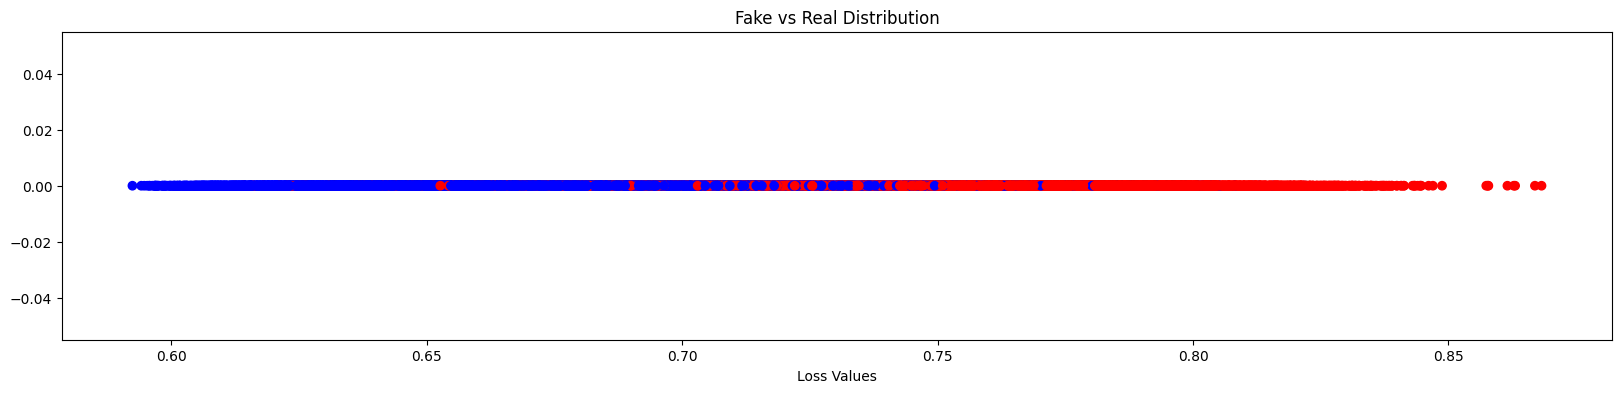

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

# Define colors for labels
colors = ['blue' if label == 0 else 'red' for label in scatter_labels]
plt.scatter(x= scatter_values, y=[0]*len(scatter_values) , c=colors, marker='o')

plt.xlabel('Loss Values')
plt.yticks()  # Hide y-axis ticks and labels
plt.title('Fake vs Real Distribution')
# plt.colorbar(label='Labels')

plt.show()
